<a href="https://colab.research.google.com/github/joelali5/Hate-Speech-classification-with-machine-learning/blob/main/Keras_embeddings_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor
import pandas as pd
import numpy as np
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer, one_hot
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# from keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
from keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import os

import seaborn as sns
import re
import matplotlib.pyplot as plt

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

from sklearn import metrics

from numpy import array
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv("/content/drive/MyDrive/labeled_data.csv")

In [3]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\ð)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower())
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [4]:
print(set(df['class']))

{0, 1, 2}


In [5]:
X = clean_tweets(df["tweet"])
y = array(df["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True, stratify=y)

unique_classes = list(set(y_train))
target_classes = ["hate_speech", "offensive_language", "neither"]

In [6]:
y_train

array([1, 1, 1, ..., 2, 1, 1])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)

print("Vocabulary Size : {}".format(len(tokenizer.index_word)))

max_tokens = 50
## Vectorizing data to keep max_tokens words per sample.
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_tokens, padding="post", truncating="post", value=0)

print(X_train[:2])

X_train.shape, X_test.shape

In [8]:
import gc
embed_len = 25
# model = Sequential()
# model.add(Embedding(len(tokenizer.index_word)+1, embed_len, input_length=max_tokens))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1))
# model.summary()

model = Sequential([
                    Embedding(len(tokenizer.index_word)+1, embed_len, input_length=max_tokens),
                    Flatten(),
                    Dense(128, activation="relu"),
                    Dense(len(target_classes), activation="softmax")
                    ]
                )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 25)            506675    
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 128)               160128    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 667,190
Trainable params: 667,190
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))
gc.collect()

Epoch 1/5
620/620 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8447 - val_loss: 0.3309 - val_accuracy: 0.8868
Epoch 2/5
620/620 [==============================] - 2s 3ms/step - loss: 0.2246 - accuracy: 0.9216 - val_loss: 0.3203 - val_accuracy: 0.8836
Epoch 3/5
620/620 [==============================] - 2s 3ms/step - loss: 0.1158 - accuracy: 0.9606 - val_loss: 0.3819 - val_accuracy: 0.8824
Epoch 4/5
620/620 [==============================] - 2s 3ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.4767 - val_accuracy: 0.8709
Epoch 5/5
620/620 [==============================] - 2s 3ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.5240 - val_accuracy: 0.8711


1402

In [ ]:
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [11]:
from sklearn.metrics import accuracy_score, classification_report

test_preds = model.predict(X_test)

print("Test  Accuracy : {}".format(accuracy_score(y_test, np.argmax(test_preds, axis=1))))
print("\nClassification Report : ")
print(classification_report(y_test, np.argmax(test_preds, axis=1), target_names=target_classes))

Test  Accuracy : 0.8710913859189026

Classification Report : 
                    precision    recall  f1-score   support

       hate_speech       0.36      0.25      0.29       286
offensive_language       0.91      0.94      0.92      3838
           neither       0.82      0.76      0.79       833

          accuracy                           0.87      4957
         macro avg       0.70      0.65      0.67      4957
      weighted avg       0.86      0.87      0.86      4957



In [38]:
# from sklearn.metrics import accuracy_score, classification_report

# test_preds = model.predict(X_test)

# test_preds = np.where(test_preds > 0.5, 1, 0)

# print("Test  Accuracy : {}".format(accuracy_score(y_test, test_preds)))
# print("\nClassification Report : ")
# print(classification_report(y_test, test_preds))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


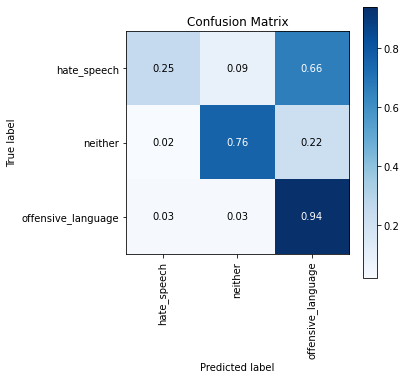

In [12]:
!pip install scikit-plot
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix([target_classes[i] for i in y_test], [target_classes[i] for i in np.argmax(test_preds, axis=1)],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    hide_zeros=True,
                                    figsize=(5,5)
                                    );
plt.xticks(rotation=90);

In [39]:
# from sklearn.metrics import confusion_matrix

# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, test_preds)

# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')